- **목표 : 10일치 데이터로 시계열 제거하고 2차원 데이터 생성하여 LSTM 적용**

# 데이터 가공

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt


In [2]:
# load
arr = np.load("./data/3d_array2.npy")
label = np.load("./data/3d_array_label.npy")

In [3]:
[int(i) for i in arr[0,:,:].sum(axis=1)]

[0, 0, 0, 0, 0, 11, 16, 9, 8, 17]

In [4]:
len(arr)

7799

In [5]:
arr_2d = []
for i in range(len(arr)):
    for k in arr[i,:,:].sum(axis=1):
        if k>0:
            k=1
        arr_2d.append(k)
arr_2d = np.array(arr_2d)

In [6]:
len(arr_2d)

77990

In [7]:
arr_2d = arr_2d.reshape(-1,10)

In [8]:
arr_2d

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [9]:
arr_2d.shape

(7799, 10)

In [13]:
# save
np.save("./data/arr_2d.npy", arr_2d)
# load
yyy = np.load("./data/arr_2d.npy")

In [14]:
yyy.shape

(7799, 10)

In [12]:
len(arr_2d)*0.7

5459.299999999999

In [25]:
arr_2d[:5460,:].shape

(5460, 10)

# 모델적용

In [26]:
# 5460 기준으로 나눔
i = 5460
x_train = arr_2d[:i,:]
y_train = label[:i]
x_test = arr_2d[i:,:]
y_test = label[i:]

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5460, 10), (5460, 1), (2339, 10), (2339, 1))

In [15]:
# model = Sequential()

# #첫 번째 Layer
# model.add(Dense(256, input_dim=10, activation='sigmoid')) 
# # model.add(Dropout(0.3))

# # 두 번째 Layer (Hidden layer 1) 
# # 두 번째 Layer부터는 output_dim만 설정하면 된다 
# # input_dim은 이전 레이어의 output_dim과 같다고 가정함 
# # model.add(Dense(256, activation='relu')) 
# # model.add(Dropout(0.3))

# # 세 번째 Layer (Hidden layer 2) 
# # model.add(Dense(256, activation='relu')) 
# # model.add(Dropout(0.3)) 

# # 네 번째 Layer (Hidden layer 3) 
# # model.add(Dense(256, activation='relu')) 
# # model.add(Dropout(0.3)) 

# # 다섯 번째 Layer (Output layer) 
# # Output layer는 softmax activation function 

# model.add(Dense(1, activation='sigmoid'))
# model.summary()

In [29]:
model = Sequential()
model.add(Dense(256, input_dim=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [30]:
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop])

Epoch 1/200
32/32 [==============================] - 8s 8ms/step - loss: 0.6799 - acc: 0.5373 - val_loss: 0.7321 - val_acc: 0.5861
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6052 - acc: 0.7041 - val_loss: 0.7136 - val_acc: 0.5861
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6113 - acc: 0.6950 - val_loss: 0.7151 - val_acc: 0.5861
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6173 - acc: 0.6861 - val_loss: 0.7303 - val_acc: 0.5861
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6016 - acc: 0.7037 - val_loss: 0.7101 - val_acc: 0.5861
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6022 - acc: 0.7038 - val_loss: 0.7048 - val_acc: 0.5861
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6008 - acc: 0.7051 - val_loss: 0.7106 - val_acc: 0.5861
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6030 - a

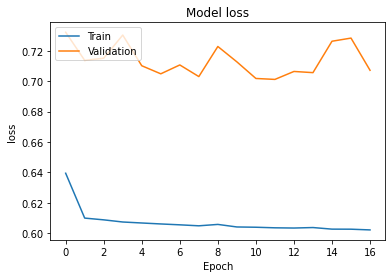

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

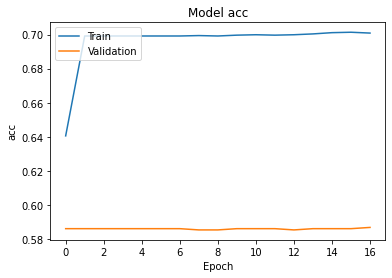

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
pred = model.predict(x_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [34]:
y_test.shape

(2339, 1)

In [35]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.4762719110731082


In [36]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(Dense(256, activation='tanh', input_dim=10))
lstm.add(Dense(50, activation='tanh'))
lstm.add(Dense(1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 15,717
Trainable params: 15,717
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(x_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop])

Epoch 1/200
32/32 [==============================] - 1s 5ms/step - loss: 0.6345 - acc: 0.6705 - val_loss: 0.6986 - val_acc: 0.5861
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6168 - acc: 0.6912 - val_loss: 0.7320 - val_acc: 0.5861
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6249 - acc: 0.6873 - val_loss: 0.7214 - val_acc: 0.5861
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5949 - acc: 0.7151 - val_loss: 0.6860 - val_acc: 0.5817
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6114 - acc: 0.7029 - val_loss: 0.7273 - val_acc: 0.5861
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6093 - acc: 0.6984 - val_loss: 0.7328 - val_acc: 0.5861
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6169 - acc: 0.6897 - val_loss: 0.7045 - val_acc: 0.5875
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6206 - a

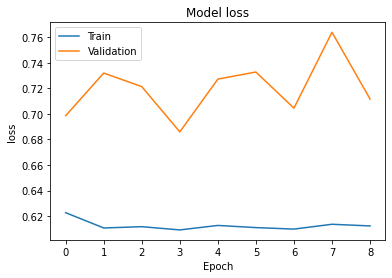

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

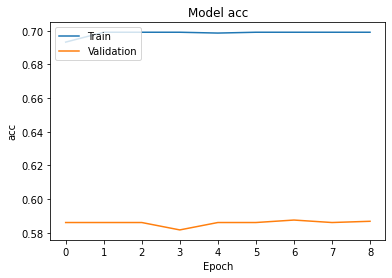

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# sum 5인 환자 subject_id 추출

0        5.0
1        8.0
2        8.0
3        9.0
4        5.0
        ... 
7794     9.0
7795     5.0
7796     9.0
7797     5.0
7798    10.0
Length: 7799, dtype: float64

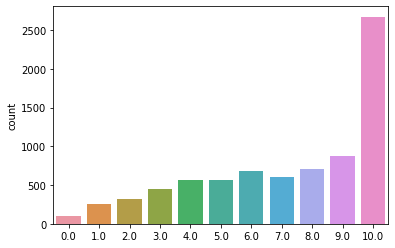

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(pd.DataFrame(arr_2d).sum(axis=1))
pd.DataFrame(arr_2d).sum(axis=1)

In [10]:
pd.DataFrame(arr_2d).sum(axis=1).value_counts()

10.0    2673
9.0      881
8.0      702
6.0      681
7.0      606
5.0      566
4.0      563
3.0      448
2.0      314
1.0      262
0.0      103
dtype: int64

In [27]:
df = pd.DataFrame(arr_2d)
df[df.sum(axis=1)>=5].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798],
           dtype='int64', length=6109)

In [18]:
arr_2d[arr_2d.sum(axis=1)>=5]

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [28]:
환자lab = pd.read_csv('/project/data/폐렴환자lab.csv')

In [31]:
df['환자'] = 환자lab['SUBJECT_ID'].unique()

In [40]:
sub5 = list(df[df.iloc[:,:-1].sum(axis=1)>=5]['환자'])
sub5

[9,
 21,
 36,
 31,
 41,
 37,
 68,
 94,
 85,
 109,
 117,
 124,
 99096,
 148,
 156,
 157,
 175,
 166,
 177,
 188,
 184,
 186,
 191,
 211,
 203,
 208,
 214,
 224,
 242,
 248,
 252,
 253,
 269,
 268,
 274,
 305,
 290,
 286,
 308,
 303,
 328,
 330,
 346,
 356,
 357,
 368,
 360,
 370,
 404,
 412,
 423,
 426,
 434,
 450,
 452,
 453,
 482,
 497,
 481,
 505,
 508,
 509,
 514,
 530,
 536,
 538,
 565,
 571,
 550,
 586,
 580,
 592,
 605,
 618,
 596,
 627,
 634,
 638,
 654,
 670,
 665,
 688,
 676,
 698,
 695,
 719,
 720,
 711,
 726,
 731,
 745,
 740,
 738,
 784,
 798,
 801,
 803,
 808,
 818,
 813,
 824,
 827,
 834,
 819,
 851,
 870,
 863,
 874,
 878,
 897,
 906,
 924,
 938,
 940,
 945,
 954,
 979,
 1006,
 1003,
 1093,
 1104,
 1106,
 1079,
 1086,
 1092,
 1098,
 1134,
 1135,
 1136,
 1119,
 1030,
 1039,
 1033,
 1041,
 1007,
 1017,
 1026,
 1049,
 1053,
 1234,
 1222,
 1224,
 1228,
 1215,
 1266,
 1264,
 1244,
 1143,
 1148,
 1158,
 1163,
 1165,
 1174,
 1182,
 1186,
 1193,
 1179,
 1184,
 1349,
 1356,
 1355

In [59]:
df[df.iloc[:,:-1].sum(axis=1)>=5].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798],
           dtype='int64', length=6109)

## 모델 적용

In [45]:
arr1 = arr_2d[arr_2d.sum(axis=1)>=5]

In [46]:
len(arr1)*0.7

4276.3

In [47]:
i = 4276
x_train = arr_2d[:i,:]
y_train = label[:i]
x_test = arr_2d[i:,:]
y_test = label[i:]

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [49]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4276, 10), (4276, 1), (3523, 10), (3523, 1))

In [62]:
lab = label[df[df.iloc[:,:-1].sum(axis=1)>=5].index]

In [63]:
# 5460 기준으로 나눔
i = 5460
x_train = arr1[:i,:]
y_train = lab[:i]
x_test = arr1[i:,:]
y_test = lab[i:]

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5460, 10), (5460, 1), (649, 10), (649, 1))

In [64]:
model = Sequential()
model.add(Dense(256, input_dim=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [65]:
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop])

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6658 - acc: 0.5817 - val_loss: 0.8182 - val_acc: 0.4586
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6184 - acc: 0.6871 - val_loss: 0.8105 - val_acc: 0.4586
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6246 - acc: 0.6798 - val_loss: 0.8207 - val_acc: 0.4586
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6150 - acc: 0.6928 - val_loss: 0.8062 - val_acc: 0.4586
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6060 - acc: 0.7020 - val_loss: 0.7894 - val_acc: 0.4586
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6110 - acc: 0.6974 - val_loss: 0.7761 - val_acc: 0.4586
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6220 - acc: 0.6821 - val_loss: 0.8004 - val_acc: 0.4586
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6193 - a

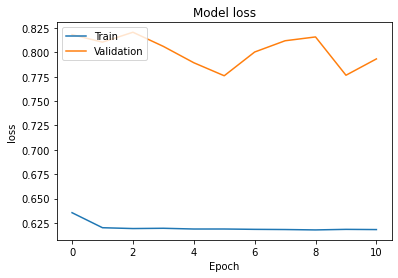

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

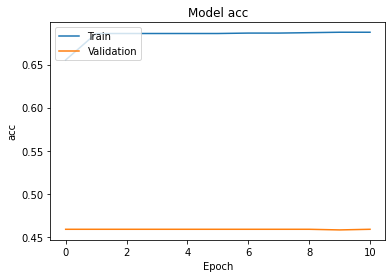

In [67]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [68]:
pred = model.predict(x_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [69]:
y_test.shape

(649, 1)

In [70]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.47303543913713403
